In [2]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Widen jupyter notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Show all columns in the head command
pd.set_option('display.max_columns', None)

In [67]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv("mxmh_survey_results.csv")

In [68]:
#Print first 5 rows
df.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [69]:
df.shape

(736, 33)

In [70]:
#Print first 5 rows
df.rename(columns={"Timestamp": "date",
                   "Age": "age",
                   "Primary streaming service": "streaming_service",
                   "Hours per day": "hours_per_day",
                   "While working": "while_working",
                   "Fav genre": "favorite_genre",
                   "Foreign languages": "foreign_languages",
                   "Music effects": "music_effects",
                   "Frequency [Classical]": "fq_classical",
                   "Frequency [Country]": "fq_country",
                   "Frequency [EDM]": "fq_edm",
                   "Frequency [Folk]": "fq_folk",
                   "Frequency [Gospel]": "fq_gospel",
                   "Frequency [Hip hop]": "fq_hip_hop",
                   "Frequency [Jazz]": "fq_jazz",
                   "Frequency [K pop]": "fq_k_pop",
                   "Frequency [Latin]": "fq_latin",
                   "Frequency [Lofi]": "fq_lofi",
                   "Frequency [Metal]": "fq_metal",
                   "Frequency [Pop]": "fq_pop",
                   "Frequency [R&B]": "fq_r&B",
                   "Frequency [Rap]": "fq_rap",
                   "Frequency [Rock]": "fq_rock",
                   "Frequency [Video game music]": "fq_video_game_music"}, inplace=True)
df.head()

,date,age,streaming_service,hours_per_day,while_working,Instrumentalist,Composer,favorite_genre,Exploratory,foreign_languages,BPM,fq_classical,fq_country,fq_edm,fq_folk,fq_gospel,fq_hip_hop,fq_jazz,fq_k_pop,fq_latin,fq_lofi,fq_metal,fq_pop,fq_r&B,fq_rap,fq_rock,fq_video_game_music,Anxiety,Depression,Insomnia,OCD,music_effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [71]:
df.columns

Index(['date', 'age', 'streaming_service', 'hours_per_day', 'while_working',
       'Instrumentalist', 'Composer', 'favorite_genre', 'Exploratory',
       'foreign_languages', 'BPM', 'fq_classical', 'fq_country', 'fq_edm',
       'fq_folk', 'fq_gospel', 'fq_hip_hop', 'fq_jazz', 'fq_k_pop', 'fq_latin',
       'fq_lofi', 'fq_metal', 'fq_pop', 'fq_r&B', 'fq_rap', 'fq_rock',
       'fq_video_game_music', 'Anxiety', 'Depression', 'Insomnia', 'OCD',
       'music_effects', 'Permissions'],
      dtype='object')

In [ ]:
# Timestamp: Date and time when form was submitted
# Age: Respondent's age
# Primary streaming service: Respondent's primary streaming service
# Hours per day: Number of hours the respondent listens to music per day
# While working: Does the respondent listen to music while studying/working?
# Instrumentalist: Does the respondent play an instrument regularly?
# Composer: Does the respondent compose music?
# Fav genre: Respondent's favorite or top genre
# Exploratory: Does the respondent actively explore new artists/genres?
# Foreign languages: Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
# BPM: Beats per minute of favorite genre
# Frequency [Classical]: How frequently the respondent listens to classical music
# Frequency [Music types]: How frequently the respondent listens to country, EDM (eletronic dance music), Folk, Gospel, Hip Hop, Jazz, K pop, Latin, Lofi, Metal, Pop, R&B, Rap, Rock or Video game music.
# Anxiety: Self-reported anxiety, on a scale of 0-10.
# Depression: Self-reported depression, on a scale of 0-10.
# Insomnia: Self-reported insomnia, on a scale of 0-10.
# OCD: Self-reported OCD, on a scale of 0-10.
# Music effects: Does music improve/worsen respondent's mental health conditions?.
# Permissions: Permissions to publicize data.


In [72]:
# Informations on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 736 non-null    object 
 1   age                  735 non-null    float64
 2   streaming_service    735 non-null    object 
 3   hours_per_day        736 non-null    float64
 4   while_working        733 non-null    object 
 5   Instrumentalist      732 non-null    object 
 6   Composer             735 non-null    object 
 7   favorite_genre       736 non-null    object 
 8   Exploratory          736 non-null    object 
 9   foreign_languages    732 non-null    object 
 10  BPM                  629 non-null    float64
 11  fq_classical         736 non-null    object 
 12  fq_country           736 non-null    object 
 13  fq_edm               736 non-null    object 
 14  fq_folk              736 non-null    object 
 15  fq_gospel            736 non-null    obj

In [74]:
# Convert the `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

In [77]:
# Dealing with missing data
df.isnull().any()

date                   False
age                    False
streaming_service      False
hours_per_day          False
while_working          False
Instrumentalist        False
Composer               False
favorite_genre         False
Exploratory            False
foreign_languages      False
BPM                     True
fq_classical           False
fq_country             False
fq_edm                 False
fq_folk                False
fq_gospel              False
fq_hip_hop             False
fq_jazz                False
fq_k_pop               False
fq_latin               False
fq_lofi                False
fq_metal               False
fq_pop                 False
fq_r&B                 False
fq_rap                 False
fq_rock                False
fq_video_game_music    False
Anxiety                False
Depression             False
Insomnia               False
OCD                    False
music_effects           True
Permissions            False
dtype: bool

In [41]:
# Create a new df of just the rows that are missing data
df_null_geo = df[pd.isnull(df.BPM)]
df_null_geo.head(len(df))

,date,age,streaming_service,hours_per_day,while_working,Instrumentalist,Composer,favorite_genre,Exploratory,foreign_languages,BPM,fq_classical,fq_country,fq_edm,fq_folk,fq_gospel,fq_hip_hop,fq_jazz,fq_k_pop,fq_latin,fq_lofi,fq_metal,fq_pop,fq_r&B,fq_rap,fq_rock,fq_video_game_music,Anxiety,Depression,Insomnia,OCD,music_effects,Permissions
10,2022-08-27 22:51:15,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,NaN,Never,Very frequently,Never,Never,Never,Never,Never,Never,Never,Never,Never,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,I understand.
12,2022-08-27 23:04:00,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,Rarely,Never,Rarely,Never,Never,Very frequently,Never,Sometimes,Never,Very frequently,Never,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.
15,2022-08-27 23:19:52,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,NaN,Rarely,Rarely,Never,Never,Never,Sometimes,Rarely,Rarely,Rarely,Rarely,Rarely,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen,I understand.
30,2022-08-28 10:30:22,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,NaN,Never,Rarely,Rarely,Very frequently,Never,Very frequently,Sometimes,Never,Sometimes,Sometimes,Very frequently,Sometimes,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve,I understand.
32,2022-08-28 10:54:30,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,NaN,Never,Never,Never,Rarely,Never,Rarely,Sometimes,Rarely,Never,Sometimes,Very frequently,Sometimes,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2022-09-24 00:42:39,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,NaN,Never,Rarely,Never,Never,Never,Very frequently,Never,Never,Never,Very frequently,Never,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect,I understand.
700,2022-10-03 10:00:01,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,NaN,Sometimes,Rarely,Rarely,Rarely,Rarely,Sometimes,Rarely,Never,Never,Rarely,Rarely,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen,I understand.
706,2022-10-03 15:38:19,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,NaN,Rarely,Rarely,Sometimes,Sometimes,Never,Sometimes,Rarely,Rarely,Never,Sometimes,Sometimes,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve,I understand.
712,2022-10-04 08:53:39,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,NaN,Never,Never,Never,Rarely,Never,Never,Sometimes,Never,Never,Rarely,Never,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve,I understand.


In [ ]:
# Primary streaming service has 1 null value (index = 197)
# Age has one null value (index = 12)
# While working has 3 null values (index = 57, 426, 561)
# Instrumentalist has 4 null values (index = 223, 408, 561, 572)
# Composer has 1 null value (index = 561)
# foreign_languages has 4 null values (index = 235, 396, 561, 666)
# BPM has 107 null values
# music_effects has 8 null values (index = 0, 1, 161, 168, 338, 441, 532, 561)

In [76]:
# Droping null values for Primary streaming service, Age, Instrumentalist, Composer, While working, foreign languages
df = df.drop([12, 57, 161, 168, 197, 223, 235, 338, 396, 408, 426, 441, 532, 561, 572, 666], axis='index').copy()

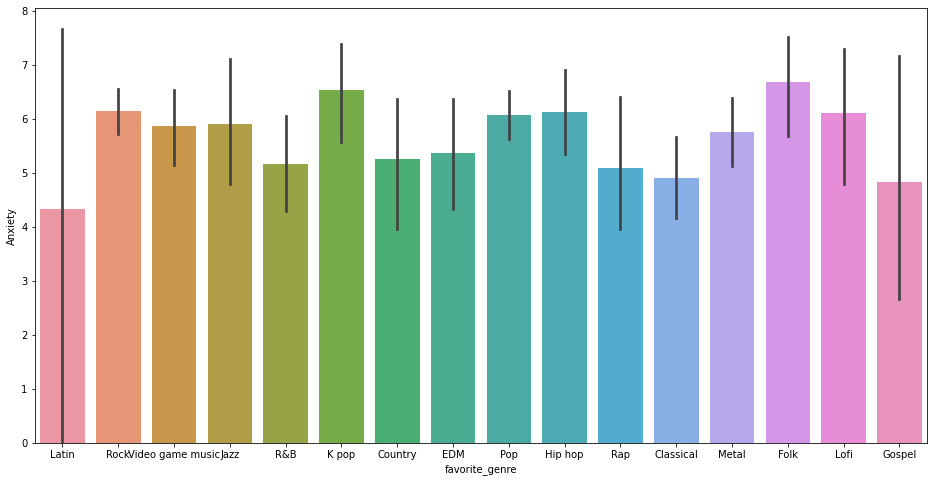

In [78]:
plt.figure(figsize=(16,8));

sns.barplot(
    data = df,
    x = 'favorite_genre',
    y = 'Anxiety');


In [79]:
# Reasons for high standard deviation
df["favorite_genre"].value_counts()

Rock                185
Pop                 114
Metal                87
Classical            51
Video game music     43
EDM                  36
R&B                  35
Hip hop              34
Folk                 29
Country              24
Rap                  22
K pop                21
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: favorite_genre, dtype: int64

In [88]:
df2 = df.drop(df[df['favorite_genre'].isin(['Lofi','Gospel','Latin'])].index)

In [82]:
df2.drop(df[df['favorite_genre'] == 'Latin'].index, inplace = True)

In [83]:
df2.drop(df[df['favorite_genre'] == 'Gospel'].index, inplace = True)

In [84]:
df2.drop(df[df['favorite_genre'] == 'Lofi'].index, inplace = True)

In [ ]:
df2.drop(df[df['favorite_genre'].isin('Lofi','Gospel','Latin')].index, inplace = True)

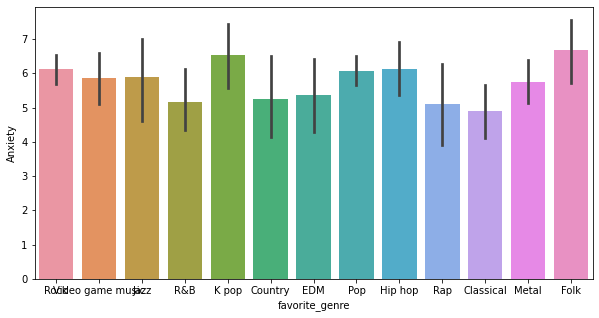

In [89]:
plt.figure(figsize=(10,5));

sns.barplot(
    data = df2,
    x = 'favorite_genre',
    y = 'Anxiety');


<AxesSubplot:xlabel='favorite_genre', ylabel='age'>

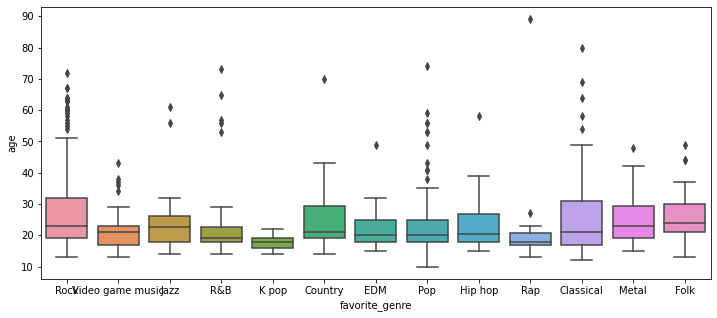

In [93]:
plt.figure(figsize=(12,5));

sns.boxplot(data=df2, y="age", x="favorite_genre")


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

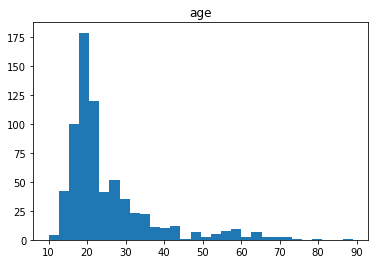

In [94]:
# Faixas etária
df.hist(['age'], bins=30, grid=False)

In [95]:
df['age'].value_counts().loc[lambda x : x>50]

18.0    79
19.0    60
17.0    57
Name: age, dtype: int64

In [97]:
df['age'].max()

89.0

Text(0, 0.5, '')

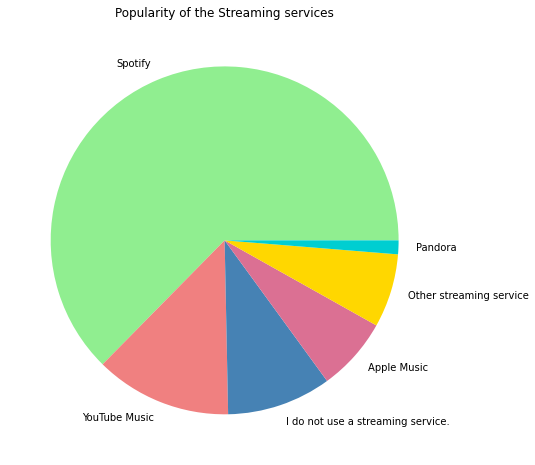

In [101]:
plt.figure(figsize=(12,8));

s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['streaming_service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Popularity of the Streaming services')
plt.ylabel("")

In [102]:
df['streaming_service'].value_counts(normalize=True)

Spotify                              0.626248
YouTube Music                        0.126961
I do not use a streaming service.    0.097004
Apple Music                          0.068474
Other streaming service              0.068474
Pandora                              0.012839
Name: streaming_service, dtype: float64

In [103]:
df['streaming_service'].value_counts(normalize=False)

Spotify                              439
YouTube Music                         89
I do not use a streaming service.     68
Apple Music                           48
Other streaming service               48
Pandora                                9
Name: streaming_service, dtype: int64

Text(0.5, 1.0, 'Streaming services by Age')

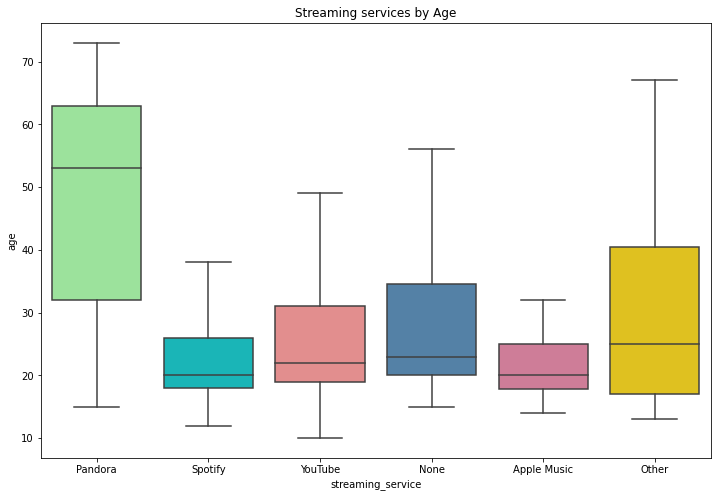

In [105]:
plt.figure(figsize=(12,8));

s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="streaming_service", y = "age",
            showfliers = False,
            palette = s_colors2)

plt.title('Streaming services by Age')

In [106]:
s_df = df.groupby(['streaming_service'])
s_ages = []
s_ages.append(s_df['age'].median())

s_ages

[streaming_service
 Apple Music    20.0
 None           23.0
 Other          25.0
 Pandora        53.0
 Spotify        20.0
 YouTube        22.0
 Name: age, dtype: float64]

In [110]:
s_df = df.groupby(['streaming_service'])
s_ages = []
s_ages.append(s_df['age'].mean())

s_ages

[streaming_service
 Apple Music    24.229167
 None           30.352941
 Other          30.520833
 Pandora        47.111111
 Spotify        22.712984
 YouTube        27.674157
 Name: age, dtype: float64]

array([[<AxesSubplot:title={'center':'hours_per_day'}>]], dtype=object)

<Figure size 1008x648 with 0 Axes>

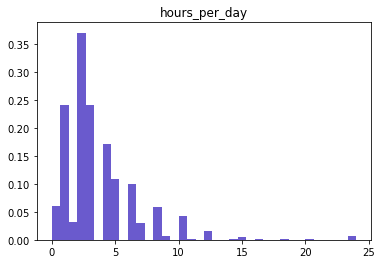

In [114]:
plt.figure(figsize=(14,9));

df.hist(['hours_per_day'], bins='auto', density=True, color = 'slateblue', grid=False)

In [115]:
df['hours_per_day'].value_counts().loc[lambda x : x>100]

2.0    167
3.0    113
1.0    112
Name: hours_per_day, dtype: int64

<AxesSubplot:ylabel='Composer'>

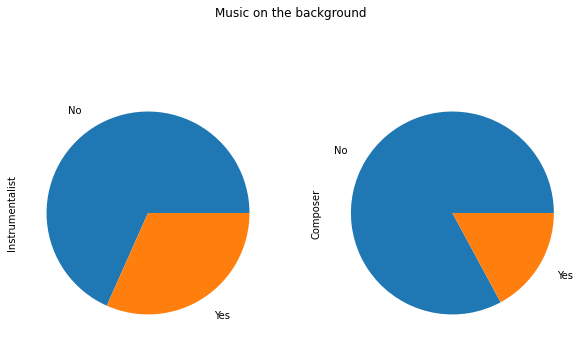

In [123]:
fig = plt.figure(figsize=(10,6))

plt.suptitle("Music on the background")

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', labeldistance = 1.2)

ax = fig.add_subplot(122)

comp = df['Composer'].value_counts()
comp.plot(kind='pie', labeldistance = 1.2)

In [120]:
df['Instrumentalist'].value_counts(normalize=True)

No     0.68331
Yes    0.31669
Name: Instrumentalist, dtype: float64

In [121]:
df['Composer'].value_counts(normalize=True)

No     0.828816
Yes    0.171184
Name: Composer, dtype: float64

In [ ]:
# Relation between mental health and Instrumentalist, Composer or not

#Try a different approach regarding Musicians and MH
# Maybe combining the two columns Instrumentalist and Composer are mutually exclusive?


In [125]:
# Change Yes or No answers to binary sistem
df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\2402432279.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\2402432279.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\2402432279.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  b2 = ax.bar(x-width, df[(df.Instrumen

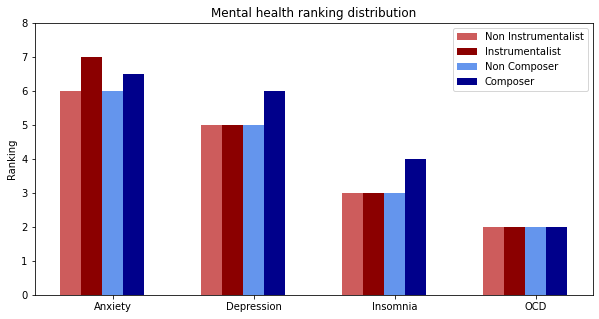

In [126]:
labels = ['Anxiety', 'Depression','Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

b1 = ax.bar(x-2*width, df[(df.Instrumentalist == 0)].median()[-4:], width, color = 'indianred', label = "Non Instrumentalist")
b2 = ax.bar(x-width, df[(df.Instrumentalist == 1)].median()[-4:], width, color = 'darkred', label = "Instrumentalist")
b3 = ax.bar(x, df[(df.Composer == 0)].median()[-4:], width, color = 'cornflowerblue', label = "Non Composer")
b4 = ax.bar(x+width, df[(df.Composer == 1)].median()[-4:], width, color = 'darkblue', label = "Composer")

ax.set_ylim([0, 8])
ax.set_ylabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

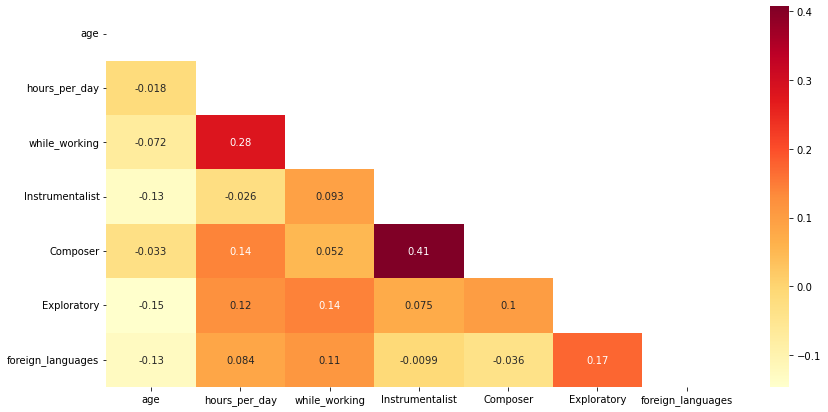

In [130]:
fig = plt.figure(figsize=(14,7))

corr_m = df.corr()
corr_m1 = corr_m.iloc[:-5 , :-5]

mask = np.triu(corr_m1)

sns.heatmap(corr_m1, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

In [ ]:
# Mental health analysis

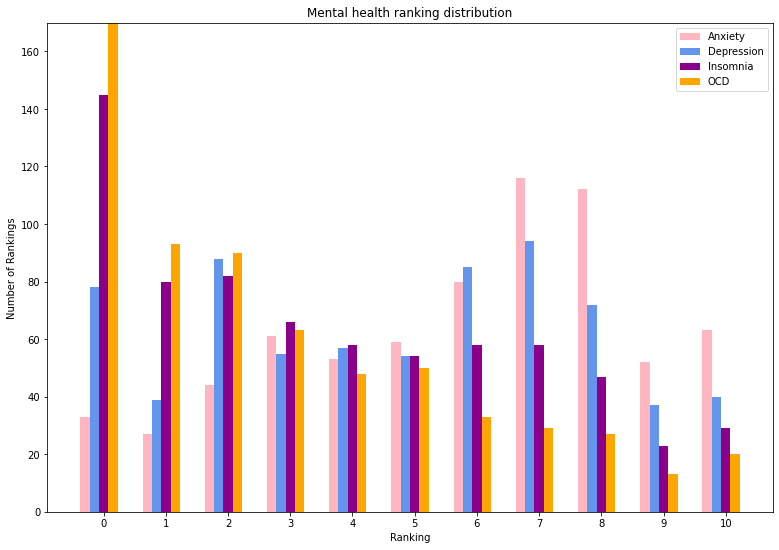

In [131]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

In [132]:
for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.85
Depression average: 4.8
Insomnia average: 3.67
OCD average: 2.64


C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\3792404305.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\3792404305.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\3792404305.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\3792404305.py:5: FutureWarning: Dropping of nuisance columns in Dat

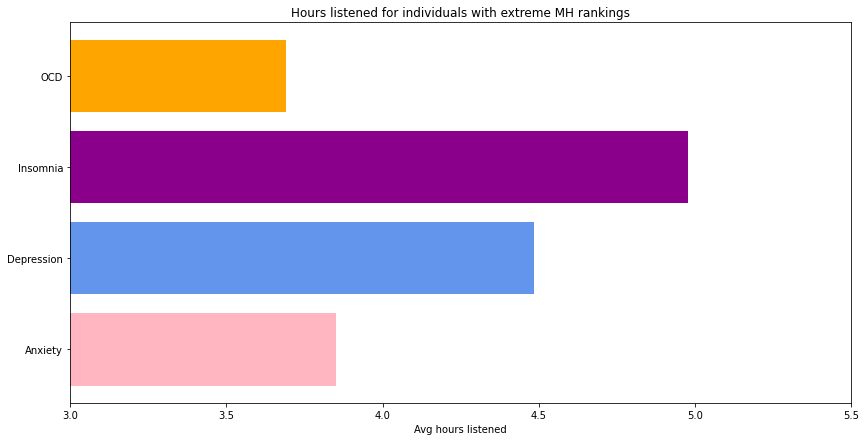

In [133]:
fig = plt.figure(figsize=(14,7))

anxiety_extreme = df.loc[(df['Anxiety'] > 8)].mean()[1]
depression_extreme = df.loc[(df['Depression'] > 8)].mean()[1]
insomnia_extreme = df.loc[(df['Insomnia'] > 8)].mean()[1]
ocd_extreme = df.loc[(df['OCD'] > 8)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with extreme MH rankings")
plt.xlim(3,5.5)
plt.show()

C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\1958109306.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\1958109306.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\1958109306.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  depression_extreme2 = df.loc[(df['Depression'] < 3)].mean()[1]
C:\Users\rafas\AppData\Local\Temp\ipykernel_10024\1958109306.py:4: FutureWarning: Dropping of nuisance columns in 

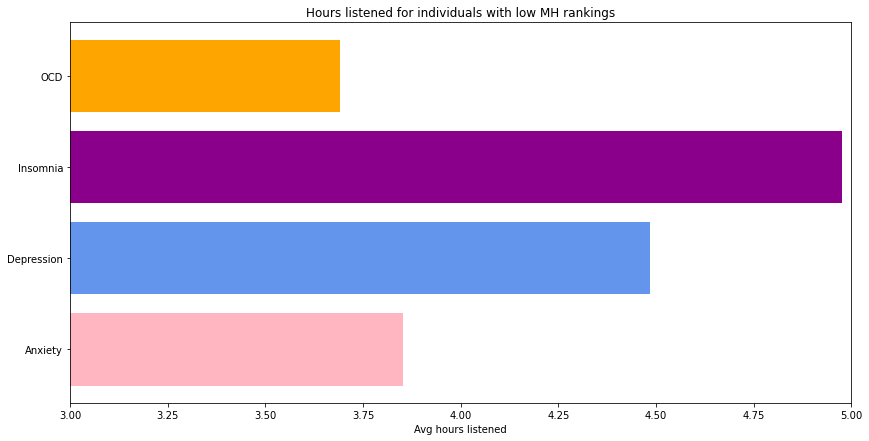

In [137]:
fig = plt.figure(figsize=(14,7));

anxiety_extreme2 = df.loc[(df['Anxiety'] < 3)].mean()[1]
depression_extreme2 = df.loc[(df['Depression'] < 3)].mean()[1]
insomnia_extreme2 = df.loc[(df['Insomnia'] < 3)].mean()[1]
ocd_extreme2 = df.loc[(df['OCD'] < 3)].mean()[1]

extreme_means = [anxiety_extreme, depression_extreme, insomnia_extreme, ocd_extreme]

plt.barh(m_all, extreme_means, color=('lightpink', 'cornflowerblue', 'darkmagenta', 'orange'))
  
plt.xlabel("Avg hours listened")
plt.title("Hours listened for individuals with low MH rankings")
plt.xlim(3,5)
plt.show()

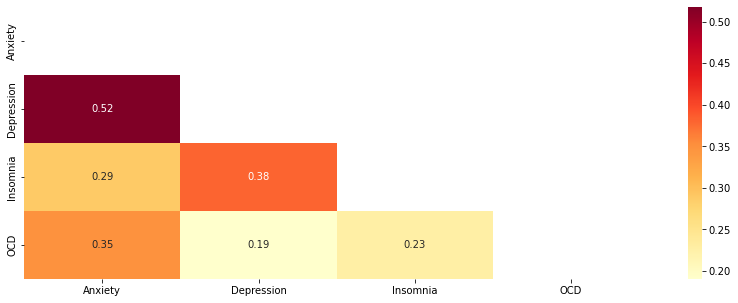

In [140]:
fig = plt.figure(figsize=(14,5));

corr_m2 = corr_m.iloc[8: , 8:]
mask = np.triu(corr_m2)

sns.heatmap(corr_m2, annot=True, mask=mask, cmap = 'YlOrRd')
plt.show()

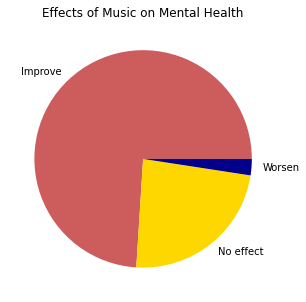

In [143]:
plt.figure(figsize=(8,5))
plt.title('Effects of Music on Mental Health')

effects = df['music_effects'].value_counts()
effects.plot(kind='pie', colors = ["indianred", "gold", "darkblue"], ylabel= '');

In [144]:
effects

Improve      518
No effect    165
Worsen        17
Name: music_effects, dtype: int64

In [ ]:
# Music genre

Text(0, 0.5, '')

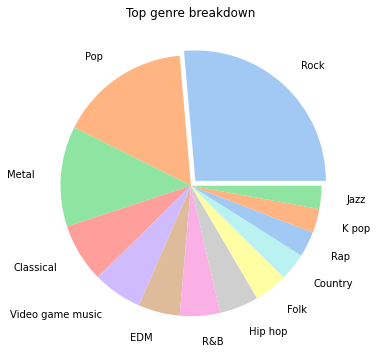

In [147]:
plt.figure(figsize=(12,6))

genre = df["favorite_genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('pastel')[0:13])

plt.title('Top genre breakdown')
plt.ylabel("")

In [148]:
df['favorite_genre'].value_counts(normalize=True)

Rock                0.263909
Pop                 0.162625
Metal               0.124108
Classical           0.072753
Video game music    0.061341
EDM                 0.051355
R&B                 0.049929
Hip hop             0.048502
Folk                0.041369
Country             0.034237
Rap                 0.031384
K pop               0.029957
Jazz                0.028531
Name: favorite_genre, dtype: float64

In [149]:
df['favorite_genre'].value_counts(normalize=False)

Rock                185
Pop                 114
Metal                87
Classical            51
Video game music     43
EDM                  36
R&B                  35
Hip hop              34
Folk                 29
Country              24
Rap                  22
K pop                21
Jazz                 20
Name: favorite_genre, dtype: int64

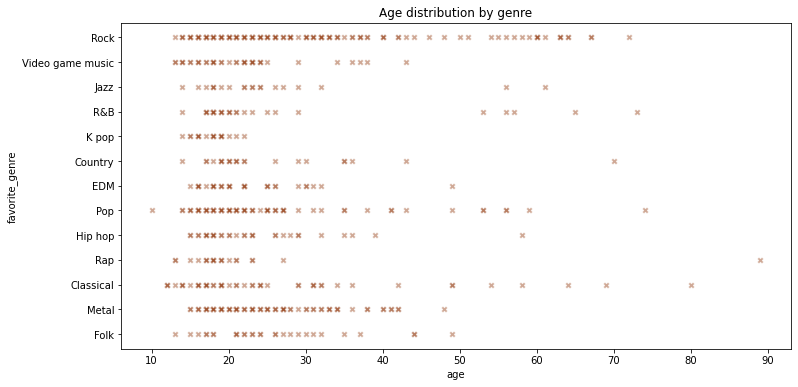

In [151]:
# age and genre
plt.figure(figsize=(12,6))

sns.scatterplot(data=df, y="favorite_genre", x="age", alpha = 0.5, marker = "X", color = "sienna")
plt.title('Age distribution by genre');

In [124]:
df.columns

Index(['date', 'age', 'streaming_service', 'hours_per_day', 'while_working',
       'Instrumentalist', 'Composer', 'favorite_genre', 'Exploratory',
       'foreign_languages', 'BPM', 'fq_classical', 'fq_country', 'fq_edm',
       'fq_folk', 'fq_gospel', 'fq_hip_hop', 'fq_jazz', 'fq_k_pop', 'fq_latin',
       'fq_lofi', 'fq_metal', 'fq_pop', 'fq_r&B', 'fq_rap', 'fq_rock',
       'fq_video_game_music', 'Anxiety', 'Depression', 'Insomnia', 'OCD',
       'music_effects', 'Permissions'],
      dtype='object')